# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [1]:
#Type your code here

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from matplotlib import colors

import numpy as np
np.round_ = np.round
np.unicode_ = np.str_

from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
import datetime
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as py
import plotly.express as px
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [3]:
df= pd.DataFrame(pd.read_csv("C:/Users/ASUS/JupyterNotebook/Machine Learning/Dicoding/Customer marketing.csv", sep="\t"))
df

ID_  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
from sklearn.preprocessing import LabelEncoder

# Struktur Data
print("Jumlah baris dan kolom:", df.shape)
print("\nInformasi dataset:\n")
print(df.info())
print("\nTinjauan data 5 baris pertama:\n")
print(df.head())
print("\nRingkasan statistik:\n")
print(df.describe())

Jumlah baris dan kolom: (2240, 29)

Informasi dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID_                  2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-nu


Visualisasi Data:



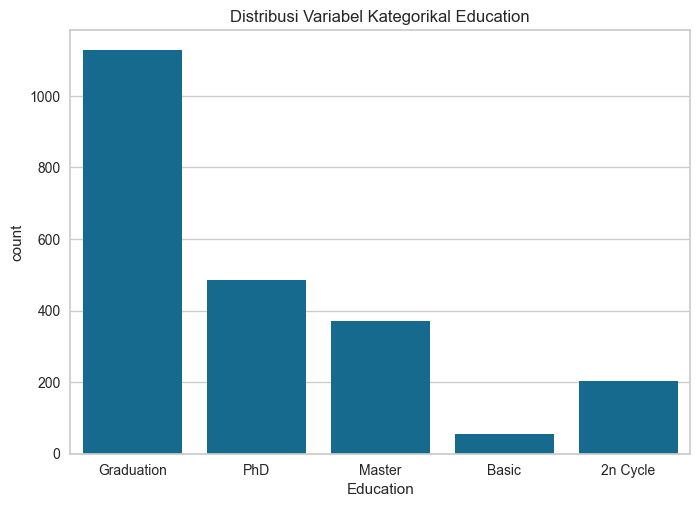

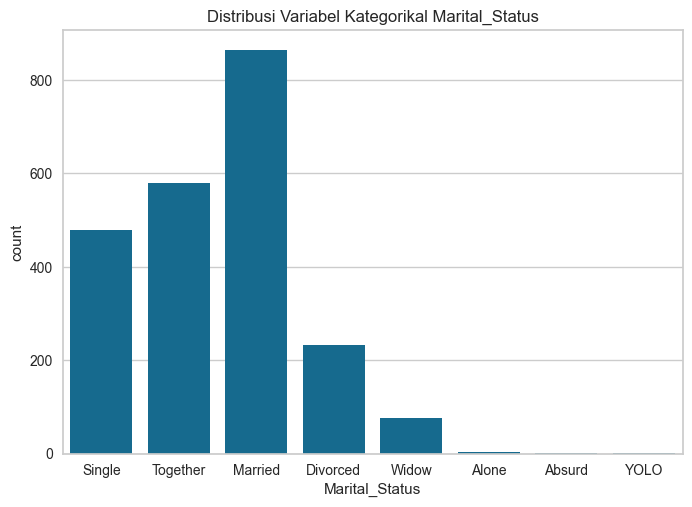

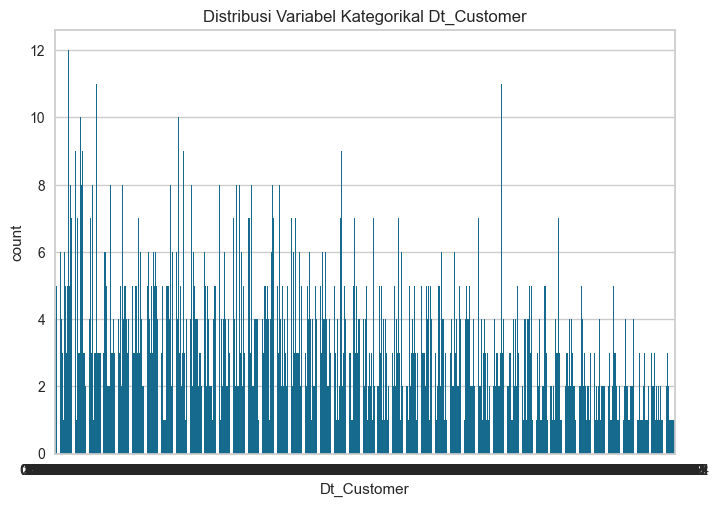

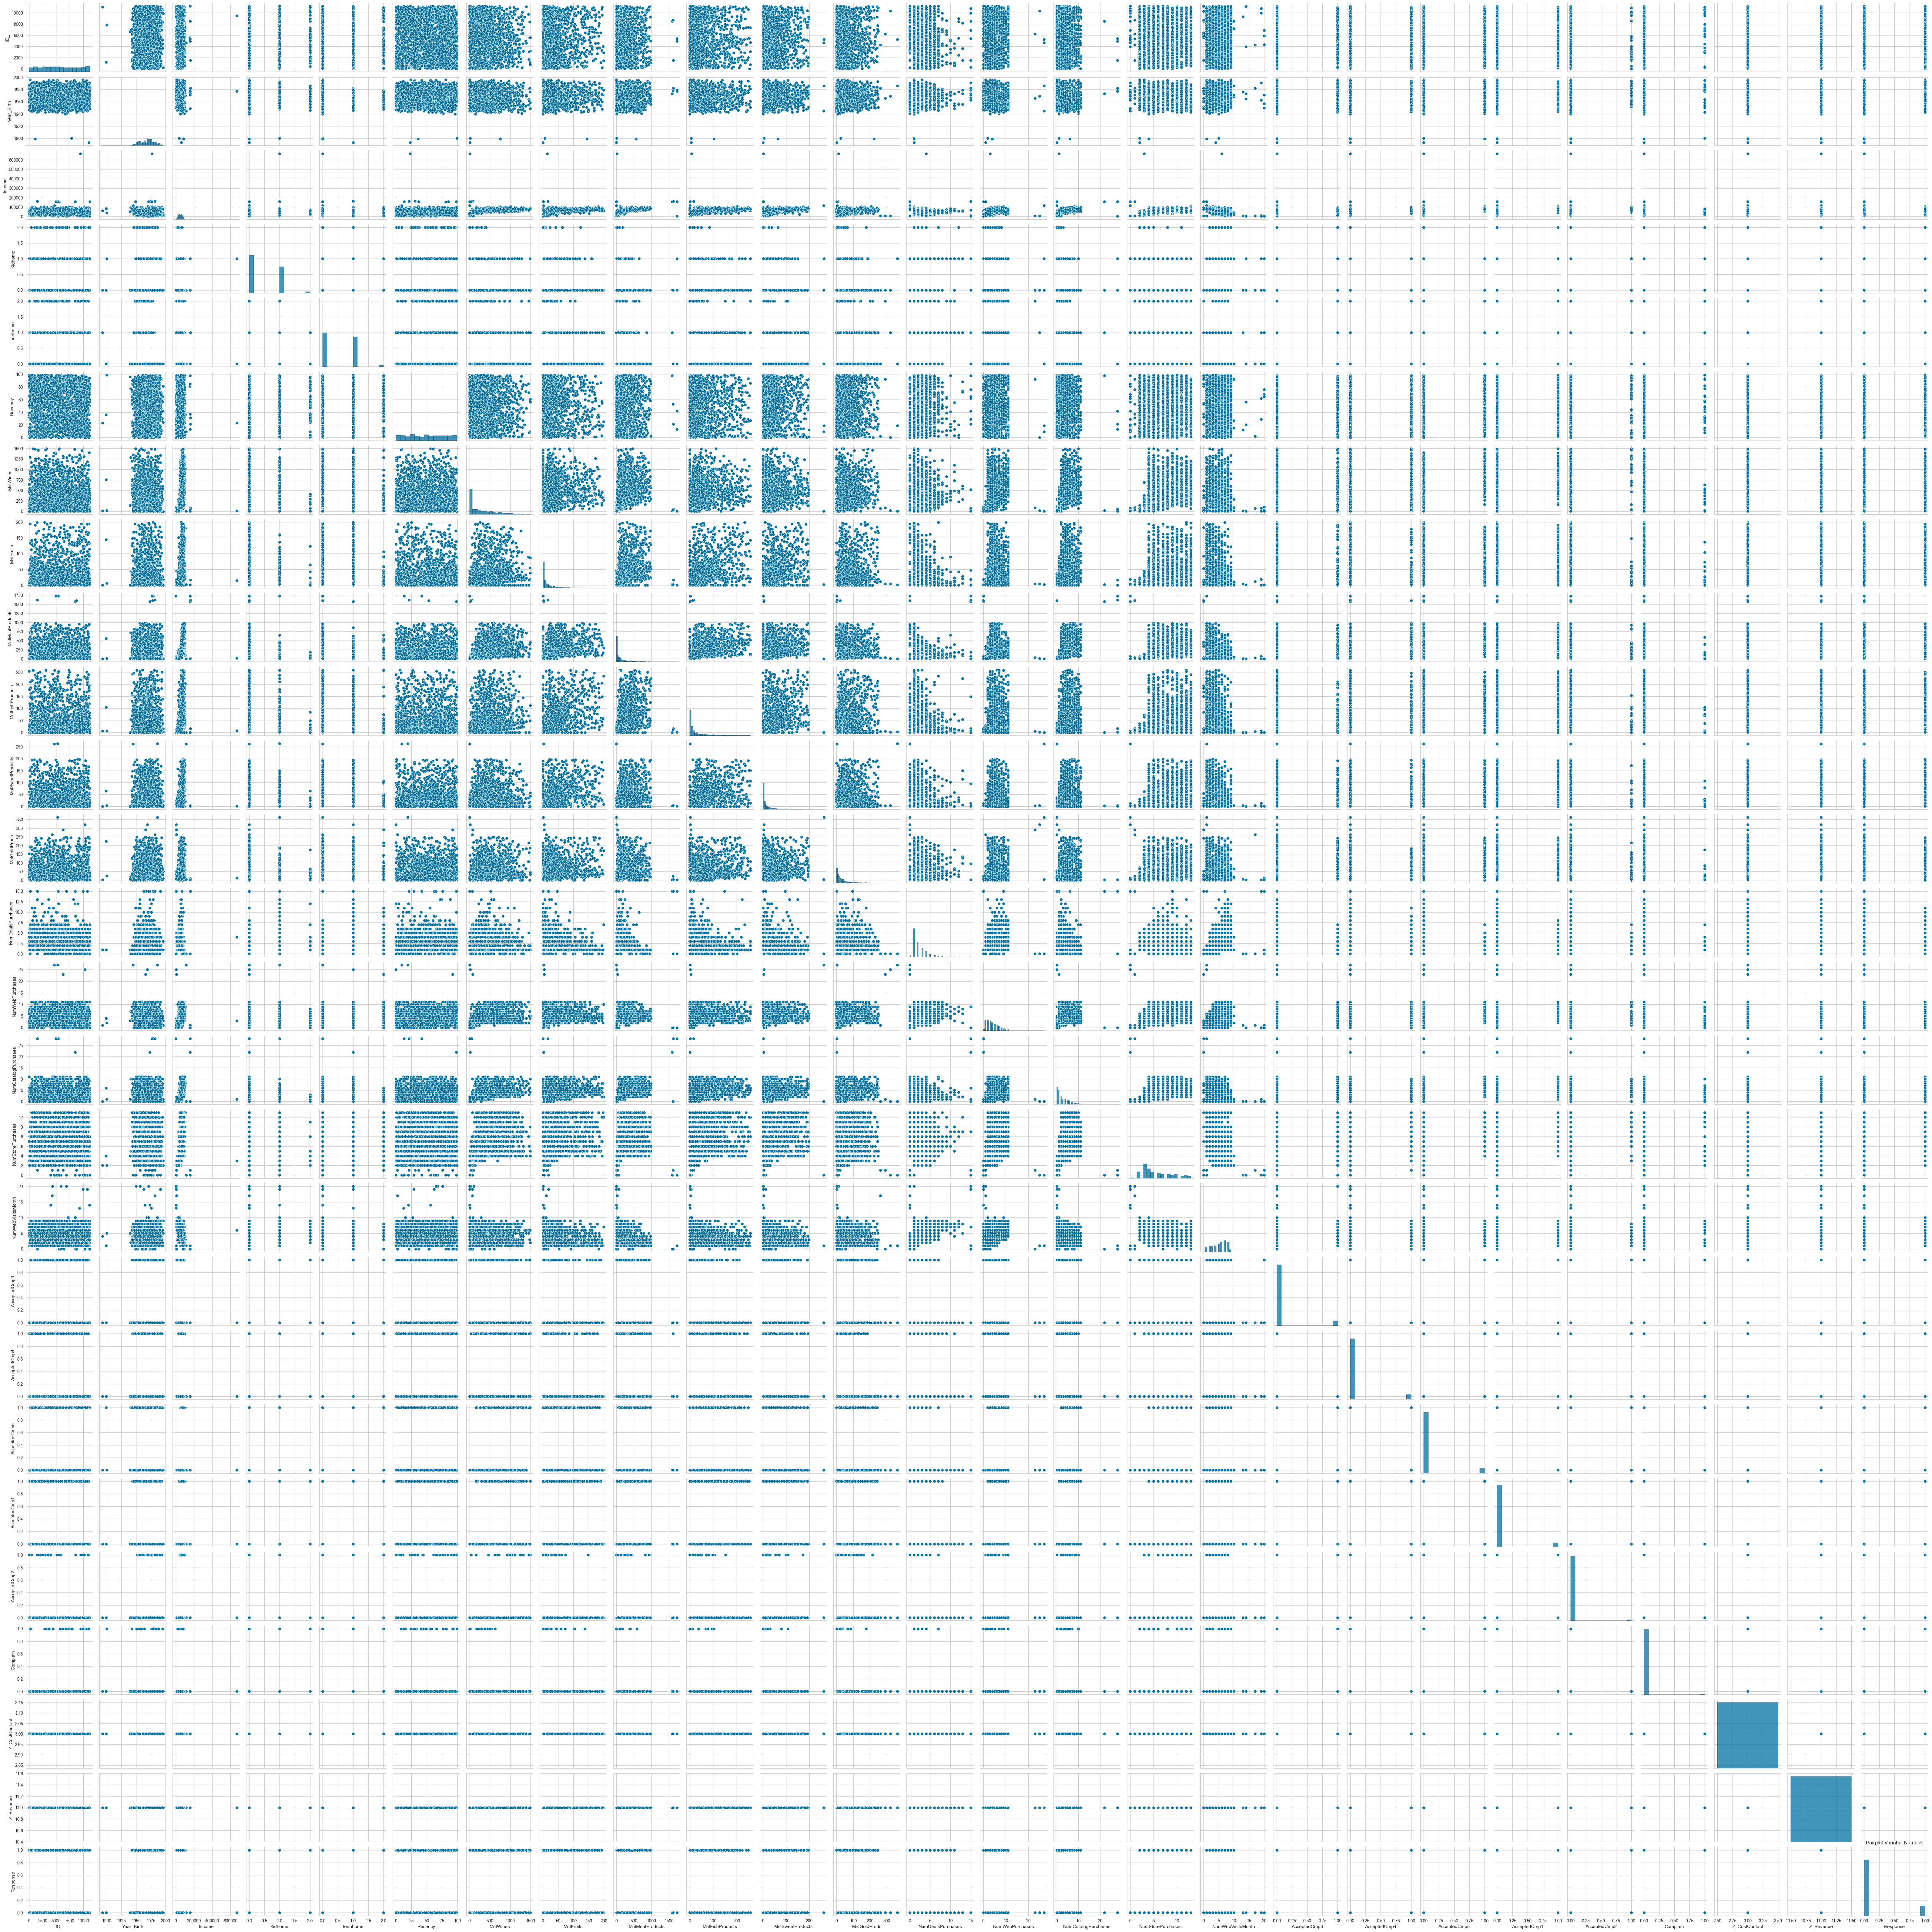

In [5]:
print("\nVisualisasi Data:\n")
# Grafik distribusi untuk variabel kategorikal
cat_columns = df.select_dtypes(include=['object']).columns
for col in cat_columns:
    plt.figure()
    sns.countplot(x=col, data=df)
    plt.title(f"Distribusi Variabel Kategorikal {col}")
    plt.show()
# Pairplot untuk variabel numerik
num_columns = df.select_dtypes(include=['number']).columns
if len(num_columns) > 1:
    sns.pairplot(df[num_columns])
    plt.title("Pairplot Variabel Numerik")
    plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [6]:
print("Jumlah missing values per kolom:\n")
print(df.isnull().sum())
df_clean = df.dropna()  # Menghapus baris dengan missing values
print("\nJumlah missing values setelah pembersihan:\n")
print(df_clean.isnull().sum())

Jumlah missing values per kolom:

ID_                     0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Jumlah missing values setelah pembersihan:

ID_                    0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teen


Encoding Data Kategorikal:



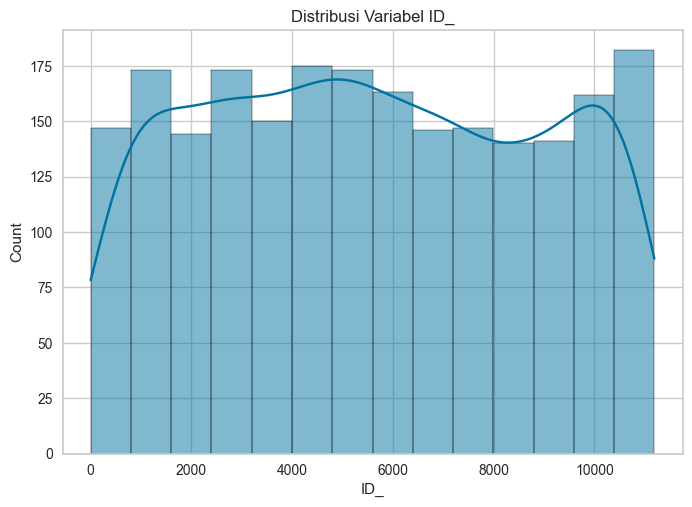

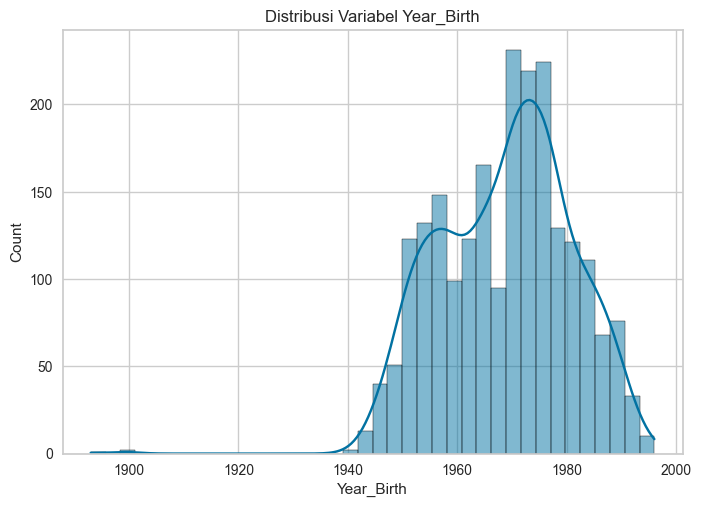

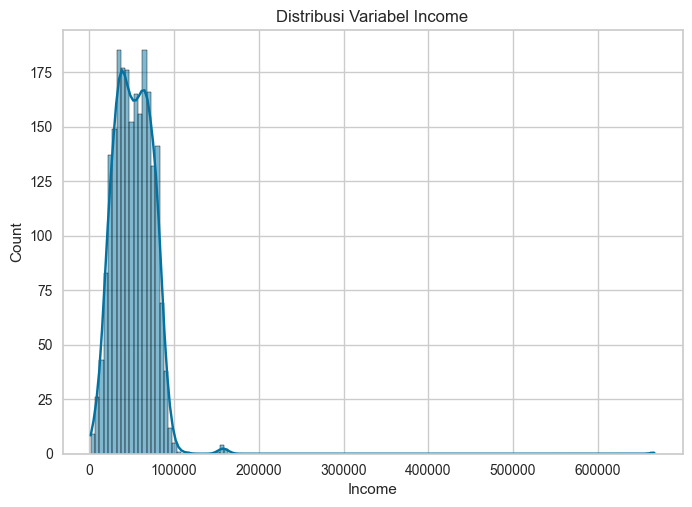

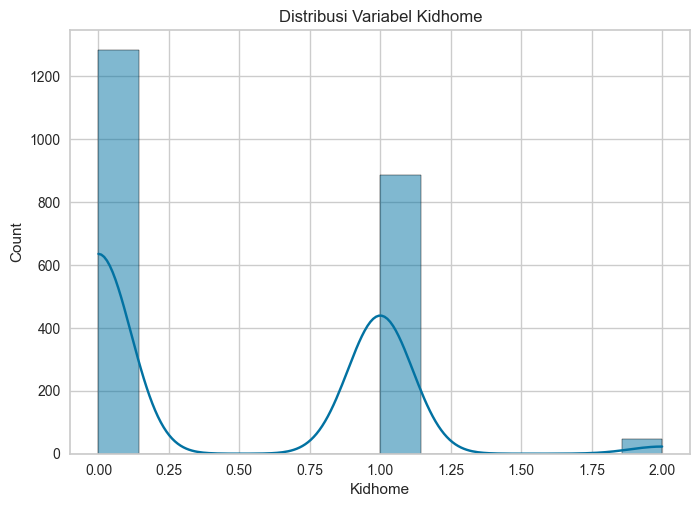

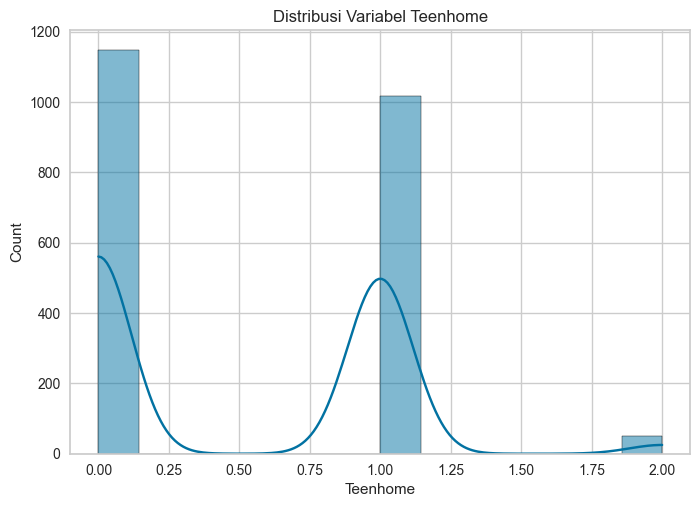

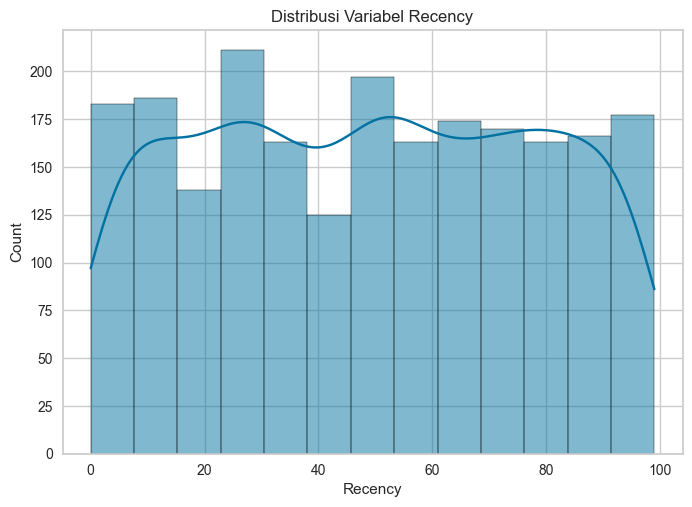

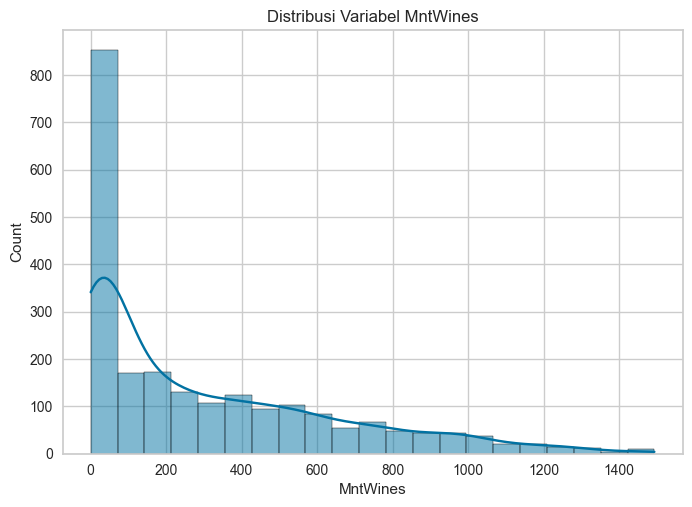

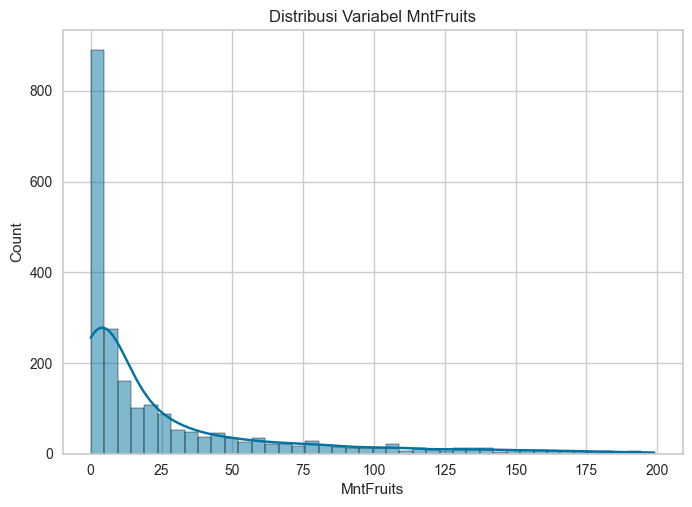

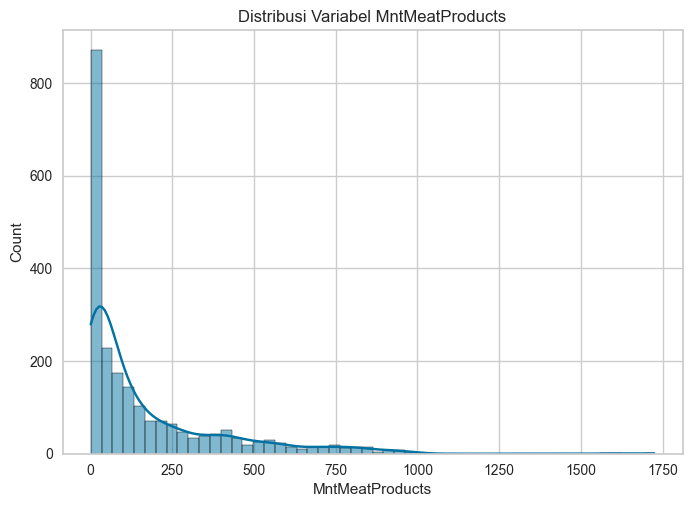

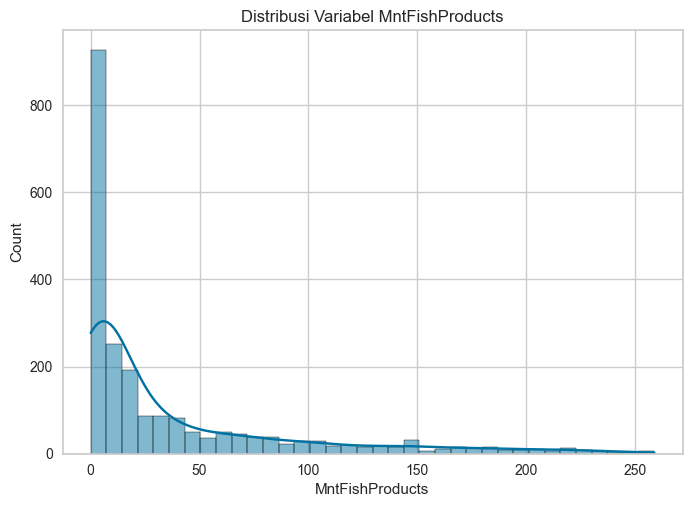

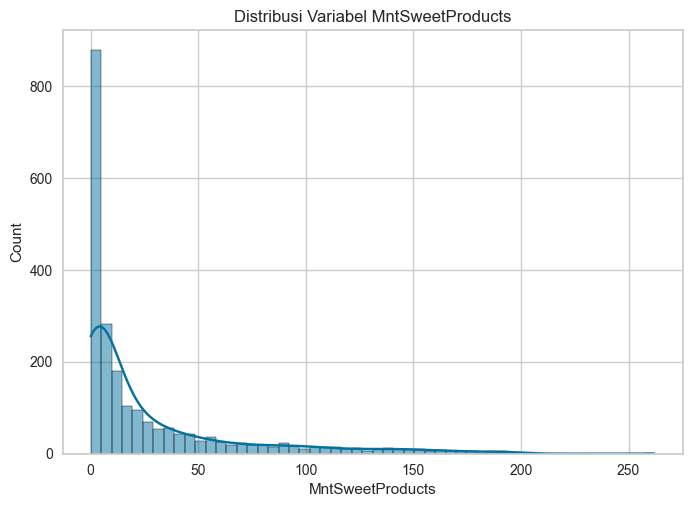

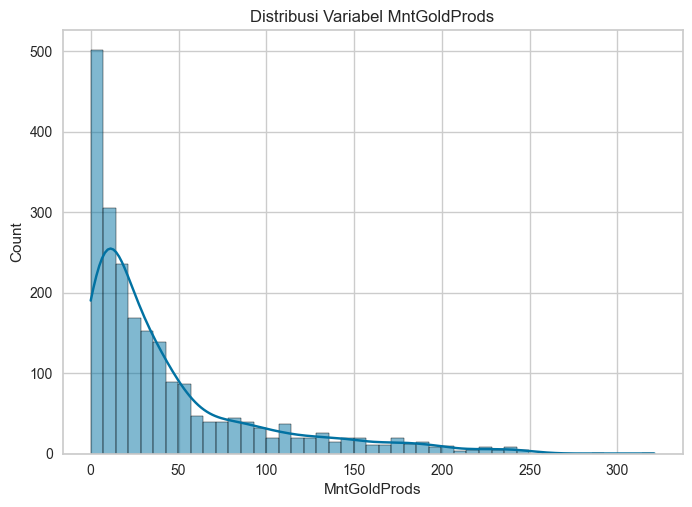

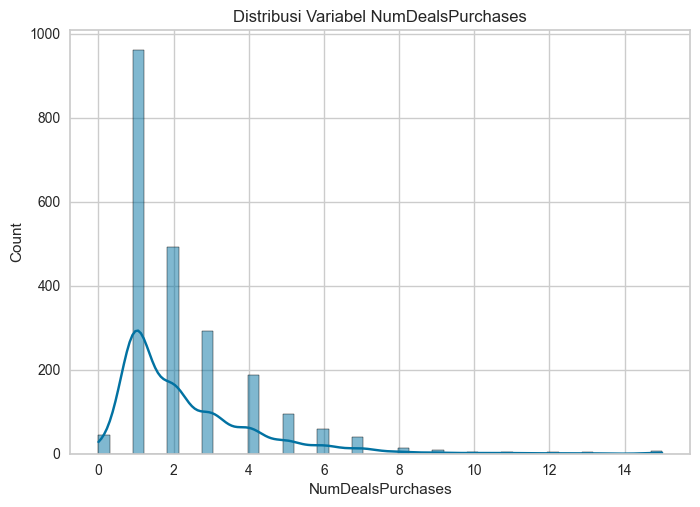

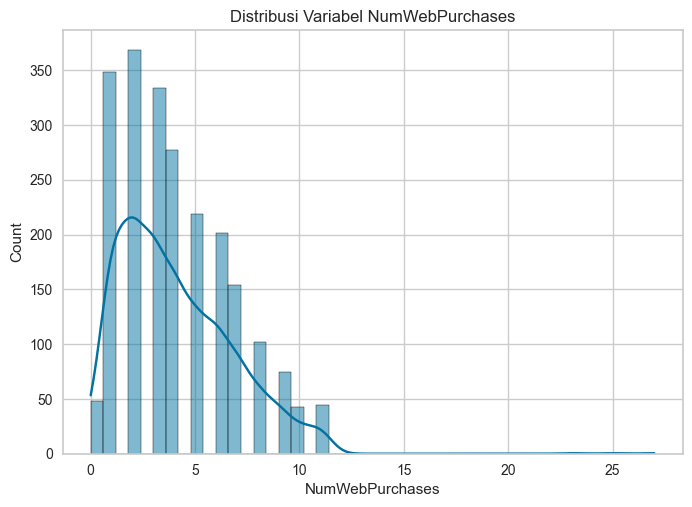

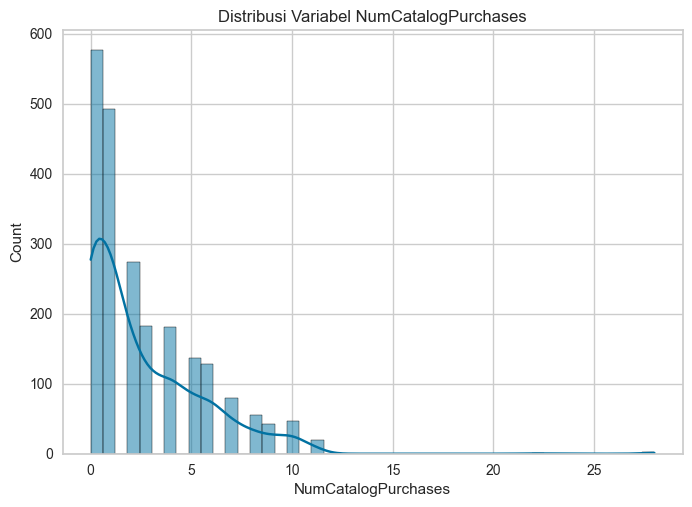

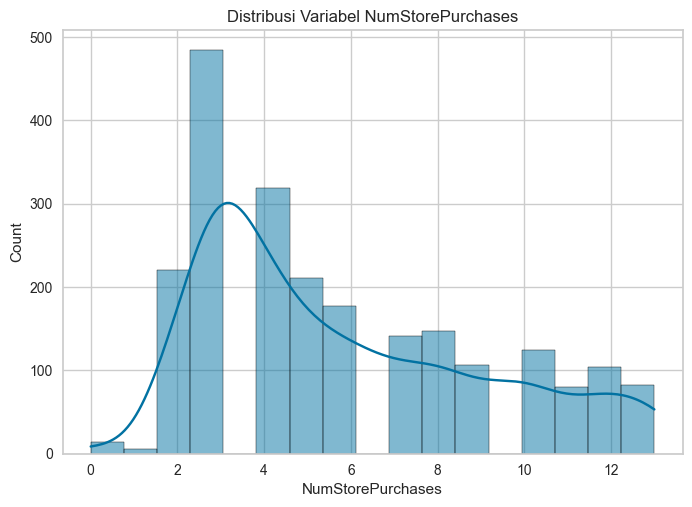

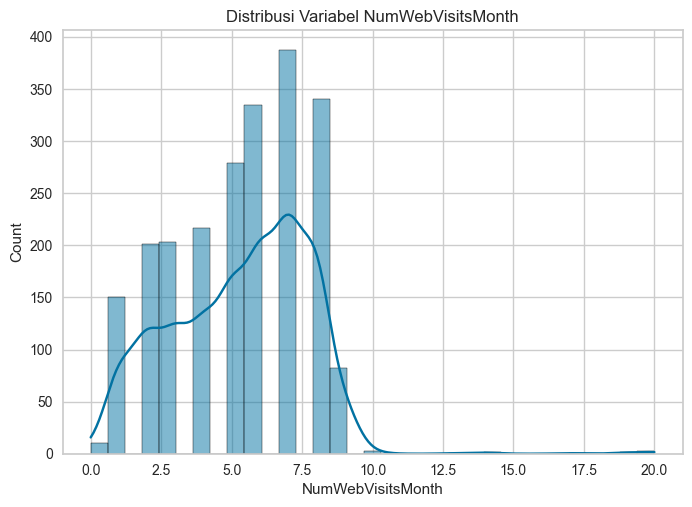

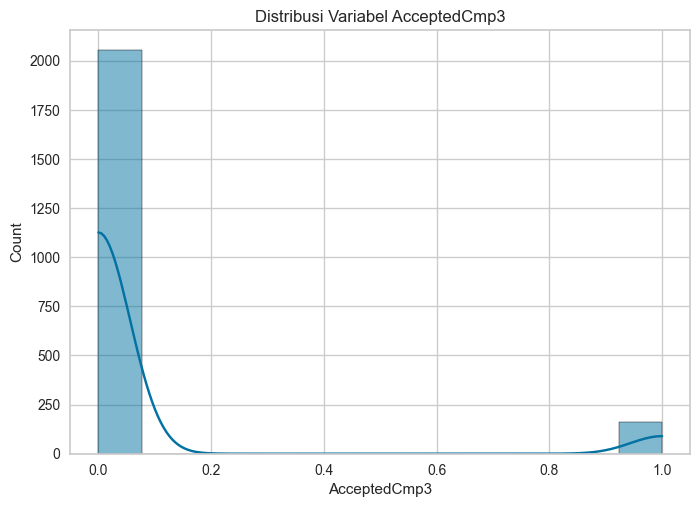

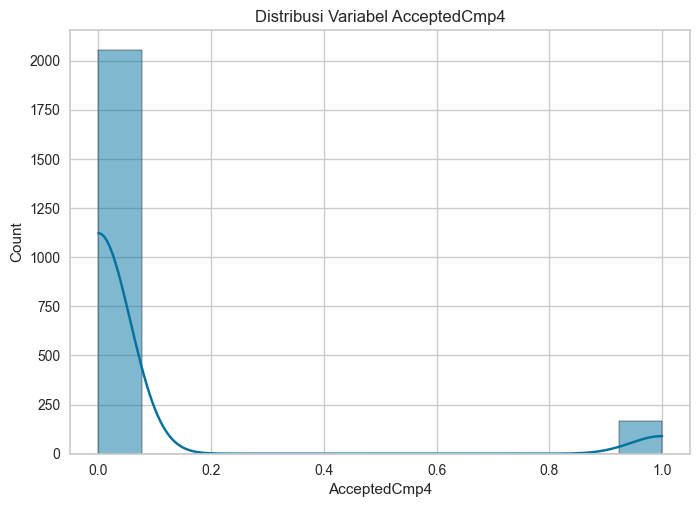

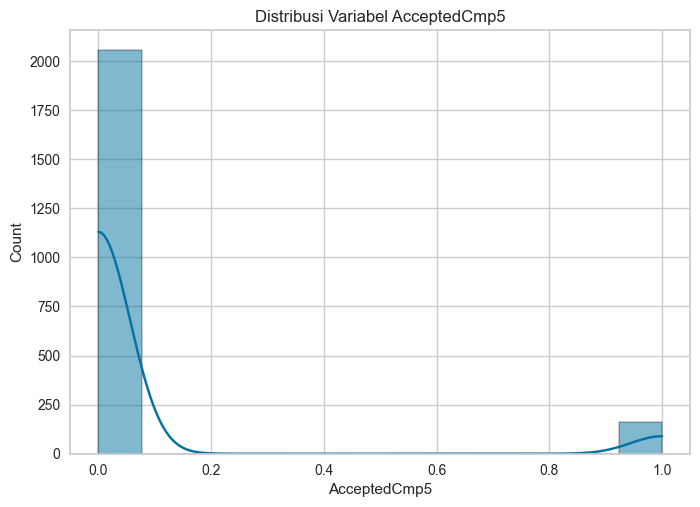

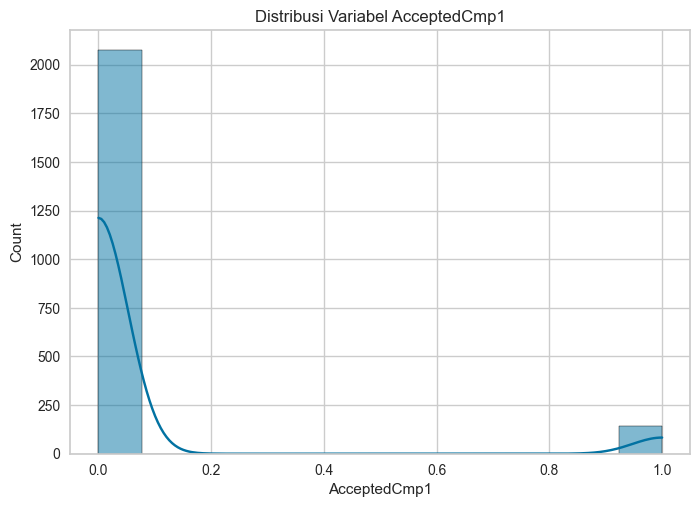

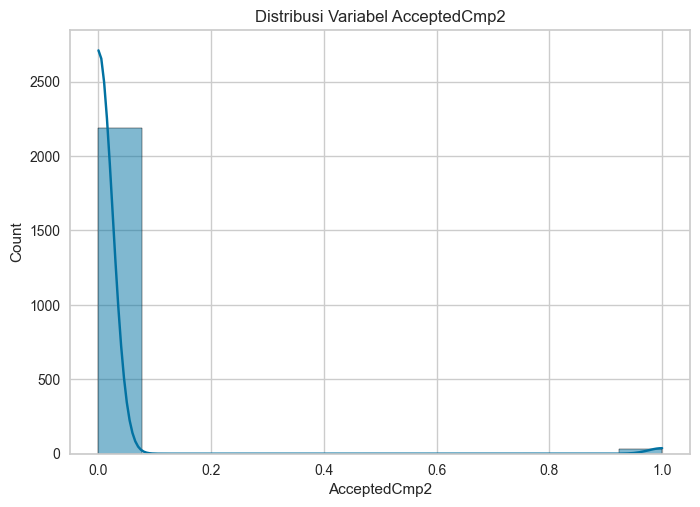

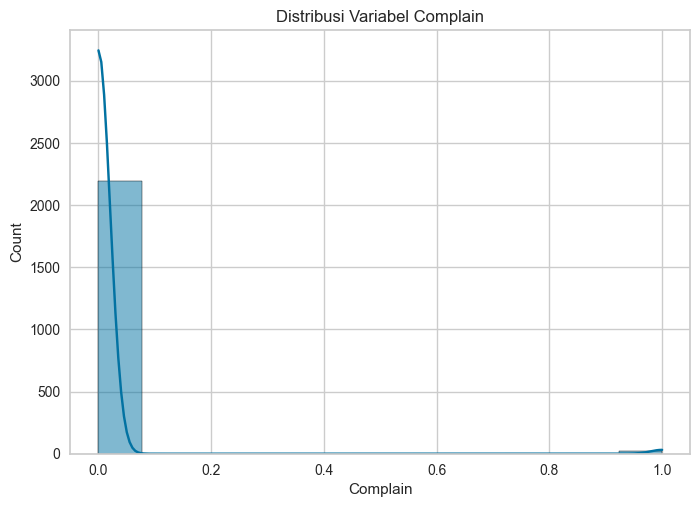

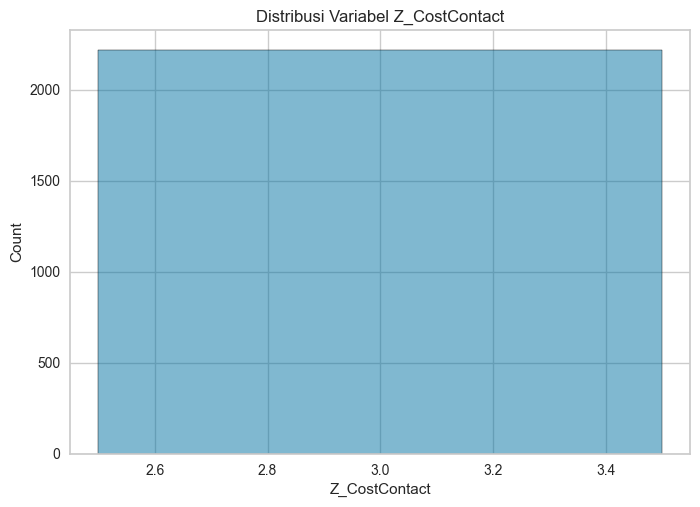

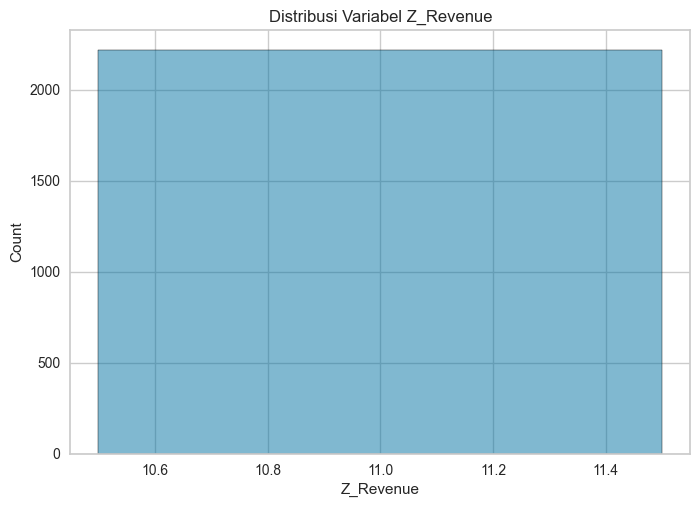

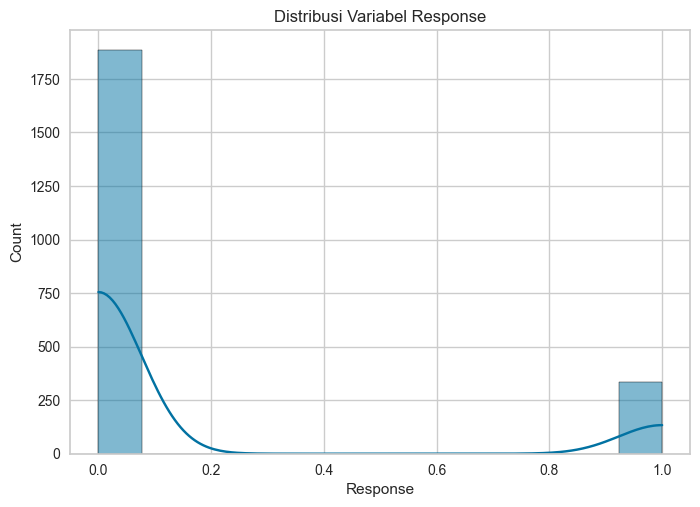

      Education  Marital_Status
0             2               4
1             2               4
2             2               5
3             2               5
4             4               3
...         ...             ...
2235          2               3
2236          4               5
2237          2               2
2238          3               5
2239          4               3

[2216 rows x 2 columns]

Data setelah encoding dan penggantian kolom:

    ID_  Year_Birth  Education  Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957          2               4  58138.0        0         0   
1  2174        1954          2               4  46344.0        1         1   
2  4141        1965          2               5  71613.0        0         0   
3  6182        1984          2               5  26646.0        1         0   
4  5324        1981          4               3  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16356\2737374001.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [7]:
print("\nEncoding Data Kategorikal:\n")

# Plot distribusi variabel numerik
num_columns = df_clean.select_dtypes(include=['number']).columns  # Perbaikan di sini
for col in num_columns:
    plt.figure()
    sns.histplot(df_clean[col], kde=True)  # Perbaikan di sini
    plt.title(f"Distribusi Variabel {col}")
    plt.show()

# Matriks korelasi
cat_columns = ['Education', 'Marital_Status']  # Pastikan kolom ini ada di df_clean
encoder = LabelEncoder()
df_encoded = df_clean[cat_columns].apply(encoder.fit_transform)
print(df_encoded)  # Output: [0 1 2 1]

# Ganti kolom 'Education' dan 'Marital_Status' di df_clean dengan df_encoded
df_clean[cat_columns] = df_encoded

# Tampilkan hasil
print("\nData setelah encoding dan penggantian kolom:\n")
print(df_clean.head())

In [8]:
df_clean = df_clean.drop(['Dt_Customer'], axis=1)

In [9]:
scaler = StandardScaler()
scaler.fit(df_clean)
df_scaler = pd.DataFrame(scaler.transform(df_clean), columns = df_clean.columns)
df_scaler

ID_  Year_Birth  Education  Marital_Status    Income   Kidhome  \
0    -0.019809   -0.986443  -0.350527        0.254218  0.234063 -0.823039   
1    -1.051009   -1.236801  -0.350527        0.254218 -0.234559  1.039938   
2    -0.445526   -0.318822  -0.350527        1.182303  0.769478 -0.823039   
3     0.182737    1.266777  -0.350527        1.182303 -1.017239  1.039938   
4    -0.081373    1.016420   1.429011       -0.673866  0.240221  1.039938   
...        ...         ...        ...             ...       ...       ...   
2211  1.625801   -0.151917  -0.350527       -0.673866  0.356642 -0.823039   
2212 -0.488620   -1.904422   1.429011        1.182303  0.467539  2.902916   
2213  0.517646    1.016420  -0.350527       -1.601951  0.188091 -0.823039   
2214  0.814693   -1.069896   0.539242        1.182303  0.675388 -0.823039   
2215  1.174843   -1.236801   1.429011       -0.673866  0.024705  1.039938   

      Teenhome   Recency  MntWines  MntFruits  ...  NumWebVisitsMonth  \
0    -0.928972  0.310532  0.978226   1.549429  ...           0.693232   
1     0.909066 -0.380509 -0.872024  -0.637328  ...          -0.131574   
2    -0.928972 -0.795134  0.358511   0.569159  ...          -0.543978   
3    -0.928972 -0.795134 -0.872024  -0.561922  ...           0.280829   
4    -0.928972  1.554407 -0.391671   0.418348  ...          -0.131574   
...        ...       ...       ...        ...  ...                ...   
2211  0.909066 -0.104093  1.197646   0.418348  ...          -0.131574   
2212  0.909066  0.241428  0.299208  -0.662463  ...           0.693232   
2213 -0.928972  1.450751  1.787710   0.544024  ...           0.280829   
2214  0.909066 -1.417072  0.364441   0.091591  ...          -0.956381   
2215  0.909066 -0.311405 -0.655568  -0.587058  ...           0.693232   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0        -0.281773     -0.282705     -0.280839     -0.261661     -0.117148   
1        -0.281773     -0.282705     -0.280839     -0.261661     -0.117148   
2        -0.281773     -0.282705     -0.280839     -0.261661     -0.117148   
3        -0.281773     -0.282705     -0.280839     -0.261661     -0.117148   
4        -0.281773     -0.282705     -0.280839     -0.261661     -0.117148   
...            ...           ...           ...           ...           ...   
2211     -0.281773     -0.282705     -0.280839     -0.261661     -0.117148   
2212     -0.281773     -0.282705     -0.280839      3.821732     -0.117148   
2213     -0.281773      3.537258     -0.280839     -0.261661     -0.117148   
2214     -0.281773     -0.282705     -0.280839     -0.261661     -0.117148   
2215     -0.281773     -0.282705     -0.280839     -0.261661     -0.117148   

      Complain  Z_CostContact  Z_Revenue  Response  
0    -0.097812            0.0        0.0  2.377952  
1    -0.097812            0.0        0.0 -0.420530  
2    -0.097812            0.0        0.0 -0.420530  
3    -0.097812            0.0        0.0 -0.420530  
4    -0.097812            0.0        0.0 -0.420530  
...        ...            ...        ...       ...  
2211 -0.097812            0.0        0.0 -0.420530  
2212 -0.097812            0.0        0.0 -0.420530  
2213 -0.097812            0.0        0.0 -0.420530  
2214 -0.097812            0.0        0.0 -0.420530  
2215 -0.097812            0.0        0.0  2.377952  

[2216 rows x 28 columns]

In [10]:
# We will now reduce the data to 3 features for clarity and clustering using PCA.
pca = PCA(n_components = 3)
pca.fit(df_scaler)
PCA_Dataset = pd.DataFrame(pca.transform(df_scaler), columns = (["col_1", "col_2", "col_3"]))
PCA_Dataset.describe().T

count          mean       std       min       25%       50%       75%  \
col_1  2216.0 -3.527062e-17  2.558861 -5.106428 -2.301989 -0.685068  2.033958   
col_2  2216.0 -1.923852e-17  1.446018 -3.560893 -1.155999 -0.149941  1.029653   
col_3  2216.0  4.168346e-17  1.387812 -3.122933 -0.737890 -0.134244  0.368895   

            max  
col_1  7.690360  
col_2  4.966542  
col_3  8.785762

In [11]:
# Proporsi variansi yang dijelaskan
explained_variance_ratio = pca.explained_variance_ratio_

for i, var in enumerate(explained_variance_ratio):
    print(f"Komponen PCA {i+1}: {var:.2%} variansi dijelaskan")


Komponen PCA 1: 25.17% variansi dijelaskan
Komponen PCA 2: 8.04% variansi dijelaskan
Komponen PCA 3: 7.40% variansi dijelaskan


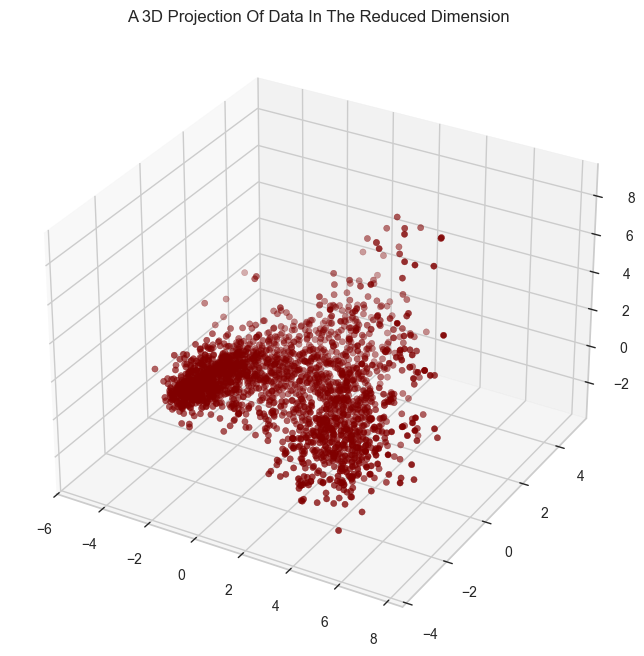

In [12]:
x =PCA_Dataset["col_1"]
y =PCA_Dataset["col_2"]
z =PCA_Dataset["col_3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [13]:
kmeans_model= KMeans(n_clusters = 4, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 42)
ypred_kmeans=kmeans_model.fit_predict(PCA_Dataset)
PCA_Dataset["Clusters"] = ypred_kmeans
#Adding the Clusters feature to the orignal dataframe.
df_scaler["Clusters"]= ypred_kmeans

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [14]:
print(f"The silhouette score for the current model is: {silhouette_score(PCA_Dataset, ypred_kmeans)}")

The silhouette score for the current model is: 0.4570086546947396


Elbow Method to determine the number of clusters to be formed:


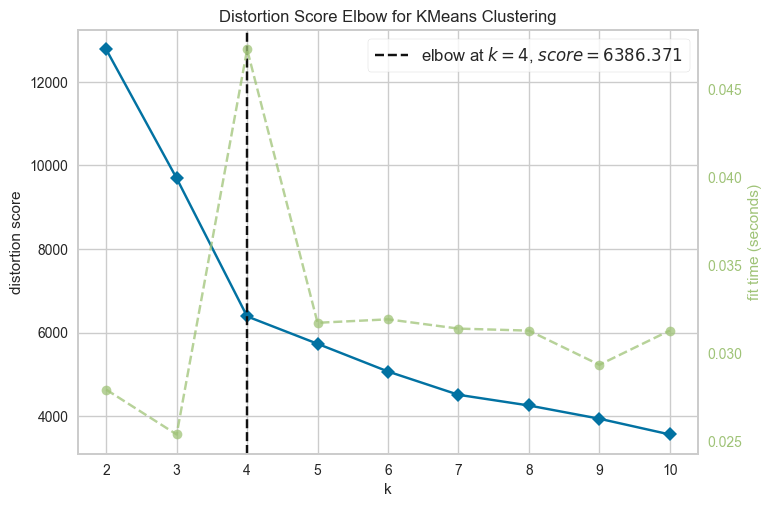

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_Dataset)
Elbow_M.show()

In [16]:
print(df_scaler.head())
print(df_scaler["Clusters"].value_counts())

        ID_  Year_Birth  Education  Marital_Status    Income   Kidhome  \
0 -0.019809   -0.986443  -0.350527        0.254218  0.234063 -0.823039   
1 -1.051009   -1.236801  -0.350527        0.254218 -0.234559  1.039938   
2 -0.445526   -0.318822  -0.350527        1.182303  0.769478 -0.823039   
3  0.182737    1.266777  -0.350527        1.182303 -1.017239  1.039938   
4 -0.081373    1.016420   1.429011       -0.673866  0.240221  1.039938   

   Teenhome   Recency  MntWines  MntFruits  ...  AcceptedCmp3  AcceptedCmp4  \
0 -0.928972  0.310532  0.978226   1.549429  ...     -0.281773     -0.282705   
1  0.909066 -0.380509 -0.872024  -0.637328  ...     -0.281773     -0.282705   
2 -0.928972 -0.795134  0.358511   0.569159  ...     -0.281773     -0.282705   
3 -0.928972 -0.795134 -0.872024  -0.561922  ...     -0.281773     -0.282705   
4 -0.928972  1.554407 -0.391671   0.418348  ...     -0.281773     -0.282705   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
0     -0

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

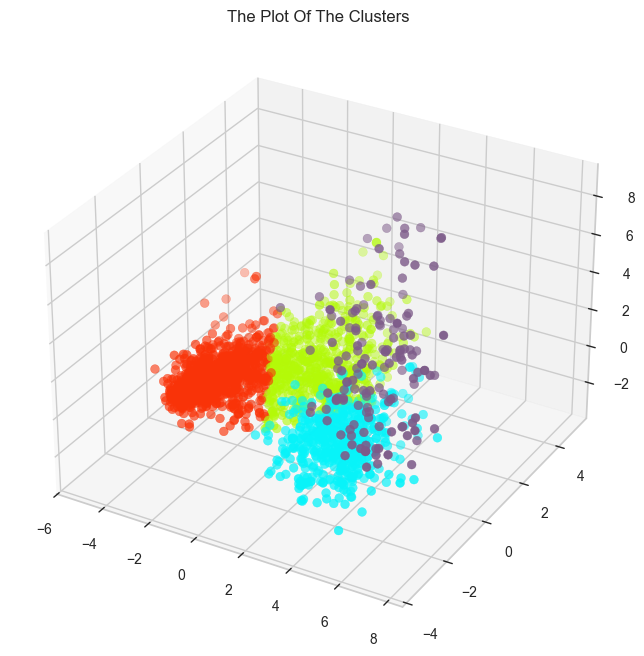

In [17]:
color = colors.ListedColormap(["#FA3308", "#B4FA08", "#08F3FA", "#7D5B89"])
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=df_scaler["Clusters"], marker='o',cmap=color )
ax.set_title("The Plot Of The Clusters")
plt.show()

In [18]:
# Interpretasi Cluster
print("\nCluster Interpretation:")
cluster_summary = df_scaler.groupby("Clusters").mean()
print(cluster_summary)

# Statistik deskriptif tambahan untuk analisis lebih mendalam
print("\nDescriptive Statistics for Each Cluster:")
for cluster in df_scaler["Clusters"].unique():
    print(f"Cluster {cluster} Statistics:")
    print(df_scaler[df_scaler["Clusters"] == cluster].describe(), "\n")


Cluster Interpretation:
               ID_  Year_Birth  Education  Marital_Status    Income   Kidhome  \
Clusters                                                                        
0         0.016934    0.288382  -0.132808       -0.007597 -0.717864  0.698989   
1        -0.042588   -0.440309   0.270380       -0.030870  0.196156 -0.381399   
2         0.018727   -0.100813  -0.110198        0.047552  0.888240 -0.734692   
3        -0.002244    0.191814   0.159690        0.020574  1.130591 -0.744872   

          Teenhome   Recency  MntWines  MntFruits  ...  NumWebVisitsMonth  \
Clusters                                           ...                      
0        -0.157703  0.001101 -0.789569  -0.538134  ...           0.497664   
1         0.817010 -0.016357  0.383420  -0.183301  ...           0.169294   
2        -0.493149  0.068739  0.624273   1.143328  ...          -0.992094   
3        -0.659051 -0.172230  1.737365   0.611871  ...          -0.786229   

          AcceptedCmp3  A

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [19]:
#Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1: Pelanggan dengan Pendapatan Tinggi dan Pengeluaran Besar
2. Cluster 2: Pelanggan dengan Pendapatan Menengah dan Aktivitas Rata-rata
3. Cluster 3: Pelanggan dengan Pendapatan Rendah atau Pengeluaran Minimal

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.